In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import confusion_matrix

import statistics

In [2]:
loan_data = pd.read_csv('Loan Data.csv')

In [3]:
loan_data.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


# Finding the missing data points

In [4]:
loan_data[loan_data.gender.isnull()].index

Int64Index([23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592], dtype='int64')

In [5]:
loan_data[loan_data.married.isnull()].index

Int64Index([104, 228, 435], dtype='int64')

In [6]:
loan_data[loan_data.ch.isnull()].index

Int64Index([ 16,  24,  30,  42,  79,  83,  86,  95, 117, 125, 129, 130, 156,
            181, 187, 198, 219, 236, 237, 259, 260, 279, 309, 313, 317, 318,
            323, 348, 363, 377, 392, 395, 411, 444, 449, 451, 460, 473, 490,
            491, 497, 503, 506, 530, 533, 544, 556, 565, 583, 600],
           dtype='int64')

In [7]:
loan_data[loan_data.loanamt.isnull()].index

Int64Index([  0,  35,  63,  81,  95, 102, 103, 113, 127, 202, 284, 305, 322,
            338, 387, 435, 437, 479, 524, 550, 551, 605],
           dtype='int64')

# Cleaning the data and Creating Dummy Variables

In [8]:
loan_data = loan_data.dropna()

In [9]:
loan_data = loan_data.drop(['gender'],axis=1)
loan_data.head()

,married,ch,income,loanamt,status
1,Yes,1.0,4583,128.0,N
2,Yes,1.0,3000,66.0,Y
3,Yes,1.0,2583,120.0,Y
4,No,1.0,6000,141.0,Y
5,Yes,1.0,5417,267.0,Y


In [10]:
loan_data['dummy_married'] = np.where(loan_data.married=='Yes',1,0)

loan_data['dummy_status'] = np.where(loan_data.status=='N',0,1)

loan_data['dummy_ch'] = np.where(loan_data.ch==1,1,0)

loan_data.describe()

,ch,income,loanamt,dummy_married,dummy_status,dummy_ch
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.844991,5350.943289,143.504726,0.640832,0.689981,0.844991
std,0.362256,6001.808110,79.893848,0.480211,0.462939,0.362256
min,0.000000,150.000000,9.000000,0.000000,0.000000,0.000000
25%,1.000000,2895.000000,100.000000,0.000000,0.000000,1.000000
50%,1.000000,3813.000000,126.000000,1.000000,1.000000,1.000000
75%,1.000000,5726.000000,165.000000,1.000000,1.000000,1.000000
max,1.000000,81000.000000,600.000000,1.000000,1.000000,1.000000


In [11]:
loan_status = loan_data['dummy_status']

loan_data_updated = loan_data.drop(['married','ch','status'],axis=1)

loan_status.value_counts()

#loan_data_updated


1    365
0    164
Name: dummy_status, dtype: int64

# Correlation & Visualization

In [12]:
loan_data_updated.corr()

,income,loanamt,dummy_married,dummy_status,dummy_ch
income,1.000000,0.524141,0.045983,-0.027201,-0.035671
loanamt,0.524141,1.000000,0.171934,-0.052089,-0.021177
dummy_married,0.045983,0.171934,1.000000,0.094535,0.016856
dummy_status,-0.027201,-0.052089,0.094535,1.000000,0.559912
dummy_ch,-0.035671,-0.021177,0.016856,0.559912,1.000000


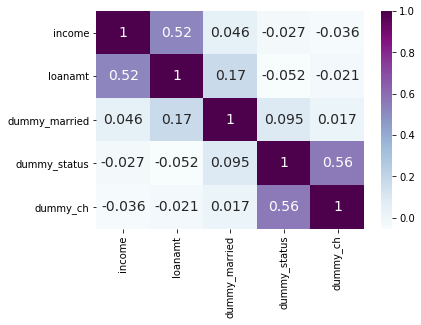

In [13]:
sns.heatmap(loan_data_updated.corr(),cmap='BuPu',annot=True,annot_kws={'size':14})
plt.show()

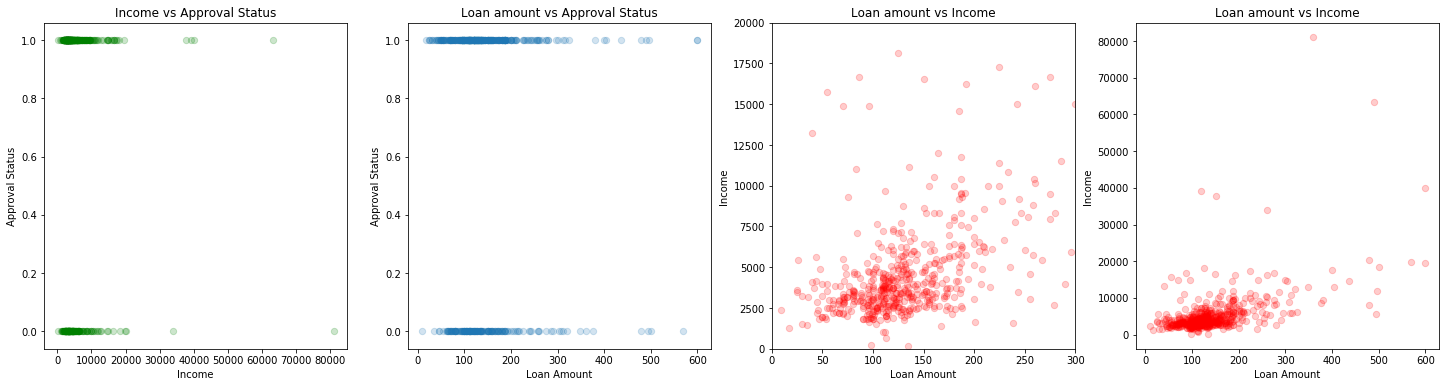

In [14]:
plt.figure(figsize=[25,6])

plt.subplot(1,4,1)
plt.title('Income vs Approval Status')
plt.xlabel('Income')
plt.ylabel('Approval Status')
plt.scatter(loan_data_updated['income'],loan_data_updated['dummy_status'], alpha=0.2,s=40,color='Green')

plt.subplot(1,4,2)
plt.title('Loan amount vs Approval Status')
plt.xlabel('Loan Amount')
plt.ylabel('Approval Status')
plt.scatter(loan_data_updated['loanamt'],loan_data_updated['dummy_status'], alpha=0.2,s=40)

plt.subplot(1,4,3)
plt.title('Loan amount vs Income')
plt.xlabel('Loan Amount')
plt.xlim(0,300)
plt.ylim(0,20000)
plt.ylabel('Income')
plt.scatter(loan_data_updated['loanamt'],loan_data_updated['income'], alpha=0.2,s=40,color='Red')

plt.subplot(1,4,4)
plt.title('Loan amount vs Income')
plt.xlabel('Loan Amount')
plt.ylabel('Income')
plt.scatter(loan_data_updated['loanamt'],loan_data_updated['income'], alpha=0.2,s=40,color='Red')

plt.show()

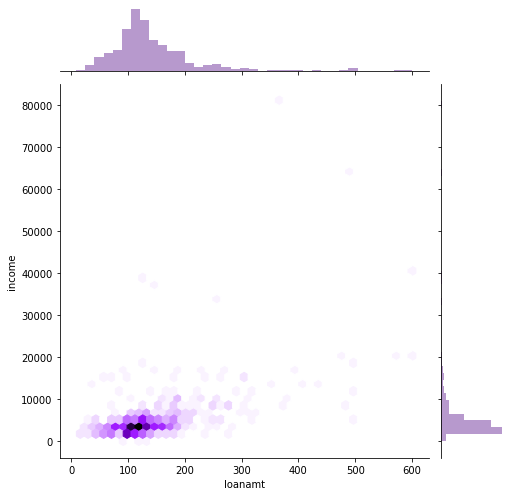

In [15]:
sns.jointplot(x=loan_data_updated['loanamt'],y=loan_data_updated['income'],height=7,kind='hex',color='indigo')
plt.show()

# Normalizing Numerical Data i.e.  Loan Amount and Income

In [16]:
scaler = StandardScaler()

loan_data_updated['normal_loanamt'] = scaler.fit_transform(loan_data_updated[['loanamt']])
loan_data_updated['normal_income'] = scaler.fit_transform(loan_data_updated[['income']])
clean_normal_data = loan_data_updated.drop(['income','loanamt'],axis=1)
clean_normal_data.head()

,dummy_married,dummy_status,dummy_ch,normal_loanamt,normal_income
1,1,0,1,-0.194250,-0.128073
2,1,1,1,-0.971015,-0.392077
3,1,1,1,-0.294478,-0.461621
4,0,1,1,-0.031380,0.108246
5,1,1,1,1.547205,0.011017


# Creating Test & Train Data

In [17]:
Y = clean_normal_data['dummy_status']
X = clean_normal_data.drop(['dummy_status'],axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10000,stratify=Y)

Y_train.value_counts()

X_train.head()

,dummy_married,dummy_ch,normal_loanamt,normal_income
164,1,1,-0.858258,0.662436
185,1,1,-0.294478,5.636309
54,1,0,1.785246,1.025504
439,1,1,-0.068966,0.298702
307,0,0,-0.494933,-0.492141


In [18]:
model = LogisticRegression()

model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
Y_predict = model.predict(X_test)
Y_predict

Y_probab = model.predict_proba(X_test)
#Y_probab

In [20]:
cm = confusion_matrix(Y_test,Y_predict)
cm
model.score(X_test,Y_test) 

0.7987421383647799

In [21]:
model.coef_

array([[ 0.45868574,  3.35900613, -0.04970971,  0.08037038]])

In [22]:
model.intercept_

array([-2.28198886])

# Valuation Tool for predicting loan status

In [23]:
mean_income = loan_data_updated.income.mean()
std_dev_income = statistics.stdev(loan_data_updated['income'])

mean_loanamt = loan_data_updated.loanamt.mean()
std_dev_loanamt = statistics.stdev(loan_data_updated['loanamt'])


def get_loan_status(Married,credit_score,loan_amount,income):
    #print(loan_amount,income,mean_loanamt,std_dev_income,mean_income,std_dev_income)
    nor_loan_amount = (loan_amount - mean_loanamt)/std_dev_loanamt
    #print(nor_loan_amount)
    
    nor_income = (income - mean_income)/std_dev_income
    #print(nor_income)
    
    data_point = [[Married,credit_score,nor_loan_amount,nor_income]]
    
    probability = model.predict_proba(data_point)
    
    if probability[0][1] < 0.43:
        prediction = 'Not Approved'
    else:
        prediction = 'Approved'
    
    print('The probability of the loan getting approved is:', round(probability[0][1]*100,0),'%')
    
    print('The status of loan approval is', prediction)

In [24]:
get_loan_status(loan_amount=200,income=200,Married=False,credit_score=False)

The probability of the loan getting approved is: 8.0 %
The status of loan approval is Not Approved


In [25]:
import pickle
with open('get_loan_status.pickle','wb') as f:
    pickle.dump(model,f)